In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r"C:\Users\hp\Downloads\top_insta_influencers_dataset.csv", encoding='latin1')

In [3]:
data

,ï»¿rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States
...,...,...,...,...,...,...,...,...,...,...
195,196,iambeckyg,71,2.3k,33.2m,623.8k,1.40%,464.7k,1.4b,United States
196,197,nancyajram,81,3.8k,33.2m,390.4k,0.64%,208.0k,1.5b,France
197,198,luansantana,79,0.77k,33.2m,193.3k,0.26%,82.6k,149.2m,Brazil
198,199,nickjonas,78,2.3k,33.0m,719.6k,1.42%,467.7k,1.7b,United States


In [4]:
data.head()

,ï»¿rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [5]:
data.shape

(200, 10)

In [6]:
data.info()
data.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ï»¿rank            200 non-null    int64 
 1   channel_info       200 non-null    object
 2   influence_score    200 non-null    int64 
 3   posts              200 non-null    object
 4   followers          200 non-null    object
 5   avg_likes          200 non-null    object
 6   60_day_eng_rate    200 non-null    object
 7   new_post_avg_like  200 non-null    object
 8   total_likes        200 non-null    object
 9   country            138 non-null    object
dtypes: int64(2), object(8)
memory usage: 15.8+ KB


ï»¿rank               int64
channel_info         object
influence_score       int64
posts                object
followers            object
avg_likes            object
60_day_eng_rate      object
new_post_avg_like    object
total_likes          object
country              object
dtype: object

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,ï»¿rank,influence_score
count,200.000000,200.000000
mean,100.500000,81.820000
std,57.879185,8.878159
min,1.000000,22.000000
25%,50.750000,80.000000
50%,100.500000,84.000000
75%,150.250000,86.000000
max,200.000000,93.000000


In [9]:
#rename column name 'rank'

data.rename(columns={'ï»¿rank':'rank'}, inplace=True)

In [10]:
data.head()

,rank,channel_info,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
0,1,cristiano,92,3.3k,475.8m,8.7m,1.39%,6.5m,29.0b,Spain
1,2,kyliejenner,91,6.9k,366.2m,8.3m,1.62%,5.9m,57.4b,United States
2,3,leomessi,90,0.89k,357.3m,6.8m,1.24%,4.4m,6.0b,NaN
3,4,selenagomez,93,1.8k,342.7m,6.2m,0.97%,3.3m,11.5b,United States
4,5,therock,91,6.8k,334.1m,1.9m,0.20%,665.3k,12.5b,United States


In [11]:
data[['rank','total_likes']]

,rank,total_likes
0,1,29.0b
1,2,57.4b
2,3,6.0b
3,4,11.5b
4,5,12.5b
...,...,...
195,196,1.4b
196,197,1.5b
197,198,149.2m
198,199,1.7b


In [12]:
#replacing specified columns and converting into float

replace = {'b': 'e9', 'm': 'e6', 'k': 'e3', '%': ''}
convert_column = ['total_likes', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like']
data[convert_column] = data[convert_column].replace(replace, regex=True).astype(float)
data[convert_column]

,total_likes,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like
0,2.900000e+10,3300.0,475800000.0,8700000.0,1.39,6500000.0
1,5.740000e+10,6900.0,366200000.0,8300000.0,1.62,5900000.0
2,6.000000e+09,890.0,357300000.0,6800000.0,1.24,4400000.0
3,1.150000e+10,1800.0,342700000.0,6200000.0,0.97,3300000.0
4,1.250000e+10,6800.0,334100000.0,1900000.0,0.20,665300.0
...,...,...,...,...,...,...
195,1.400000e+09,2300.0,33200000.0,623800.0,1.40,464700.0
196,1.500000e+09,3800.0,33200000.0,390400.0,0.64,208000.0
197,1.492000e+08,770.0,33200000.0,193300.0,0.26,82600.0
198,1.700000e+09,2300.0,33000000.0,719600.0,1.42,467700.0


In [13]:
#renaming channel info - account name

data.rename(columns={'channel_info': 'account_name'}, inplace=True)

In [14]:
data.info

<bound method DataFrame.info of      rank account_name  influence_score   posts    followers  avg_likes  \
0       1    cristiano               92  3300.0  475800000.0  8700000.0   
1       2  kyliejenner               91  6900.0  366200000.0  8300000.0   
2       3     leomessi               90   890.0  357300000.0  6800000.0   
3       4  selenagomez               93  1800.0  342700000.0  6200000.0   
4       5      therock               91  6800.0  334100000.0  1900000.0   
..    ...          ...              ...     ...          ...        ...   
195   196    iambeckyg               71  2300.0   33200000.0   623800.0   
196   197   nancyajram               81  3800.0   33200000.0   390400.0   
197   198  luansantana               79   770.0   33200000.0   193300.0   
198   199    nickjonas               78  2300.0   33000000.0   719600.0   
199   200    raisa6690               80  4200.0   32800000.0   232200.0   

     60_day_eng_rate  new_post_avg_like   total_likes        countr

In [15]:
#calucating correlation matrix for numerical values

numerical_columns =['influence_score', 'posts', 'followers', 'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes']
corr_data = data[numerical_columns].corr()
corr_data

,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes
influence_score,1.000000,0.160068,0.367713,0.051478,-0.081891,0.036548,0.237675
posts,0.160068,1.000000,0.060398,-0.343087,-0.324068,-0.290080,0.233328
followers,0.367713,0.060398,1.000000,0.349195,-0.100905,0.300914,0.667539
avg_likes,0.051478,-0.343087,0.349195,1.000000,0.754587,0.845978,0.357940
60_day_eng_rate,-0.081891,-0.324068,-0.100905,0.754587,1.000000,0.869202,-0.019524
new_post_avg_like,0.036548,-0.290080,0.300914,0.845978,0.869202,1.000000,0.329326
total_likes,0.237675,0.233328,0.667539,0.357940,-0.019524,0.329326,1.000000


In [16]:
#sorting based on the influence score

data.sort_values(by='influence_score', inplace=True)
data.tail(5)

,rank,account_name,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
6,7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
20,21,katyperry,92,2000.0,170300000.0,715000.0,0.16,265100.0,1.500000e+09,NaN
7,8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States
0,1,cristiano,92,3300.0,475800000.0,8700000.0,1.39,6500000.0,2.900000e+10,Spain
3,4,selenagomez,93,1800.0,342700000.0,6200000.0,0.97,3300000.0,1.150000e+10,United States


In [17]:
data.isnull().sum()

rank                  0
account_name          0
influence_score       0
posts                 0
followers             0
avg_likes             0
60_day_eng_rate       1
new_post_avg_like     0
total_likes           0
country              62
dtype: int64

In [18]:
data.columns

Index(['rank', 'account_name', 'influence_score', 'posts', 'followers',
       'avg_likes', '60_day_eng_rate', 'new_post_avg_like', 'total_likes',
       'country'],
      dtype='object')

In [19]:
#set rank as index

data.set_index('rank')

,account_name,influence_score,posts,followers,avg_likes,60_day_eng_rate,new_post_avg_like,total_likes,country
rank,,,,,,,,,
94,mosalah,22,840.0,52500000.0,1800000.0,2.18,1100000.0,1.500000e+09,NaN
194,zidane,41,370.0,33500000.0,1100000.0,1.61,532700.0,3.919000e+08,France
77,karimbenzema,42,2000.0,56900000.0,878500.0,1.62,918900.0,1.800000e+09,Spain
128,maisa,42,1500.0,44500000.0,553000.0,0.67,294100.0,8.201000e+08,Brazil
175,nattinatasha,47,30.0,35900000.0,518100.0,0.80,285900.0,1.870000e+07,Czech Republic
...,...,...,...,...,...,...,...,...,...
7,arianagrande,92,5000.0,327700000.0,3700000.0,1.20,3900000.0,1.840000e+10,United States
21,katyperry,92,2000.0,170300000.0,715000.0,0.16,265100.0,1.500000e+09,NaN
8,beyonce,92,2000.0,272800000.0,3600000.0,0.76,2000000.0,7.400000e+09,United States


In [20]:
#top influencers by countries

top_inf = data.groupby('country')[['account_name', 'influence_score']].apply(lambda x: x.nlargest(1, 'influence_score')).reset_index(drop=True)
top_inf

,account_name,influence_score
0,norafatehi,83
1,chrishemsworth,86
2,neymarjr,90
3,mercedesbenz,77
4,justinbieber,91
5,jamesrodriguez10,86
6,nattinatasha,47
7,hrithikroshan,85
8,psg,86
9,bmw,79


In [21]:
#cal avg for selected columns by country

avg = data.groupby('country')[['followers', 'avg_likes', 'total_likes']].mean().reset_index()
avg

,country,followers,avg_likes,total_likes
0,Anguilla,4.160000e+07,1.400000e+06,2.300000e+09
1,Australia,5.590000e+07,2.800000e+06,2.500000e+09
2,Brazil,5.660769e+07,8.351846e+05,3.151485e+09
3,British Virgin Islands,3.600000e+07,1.979000e+05,2.000000e+09
4,Canada,1.193333e+08,2.466667e+06,8.500000e+09
5,Colombia,5.203333e+07,9.938667e+05,5.033333e+09
6,Czech Republic,3.590000e+07,5.181000e+05,1.870000e+07
7,CÃÂ´te d'Ivoire,4.370000e+07,1.600000e+06,9.499000e+08
8,France,4.483333e+07,7.697333e+05,1.745217e+09
9,Germany,3.370000e+07,2.313000e+05,2.200000e+09


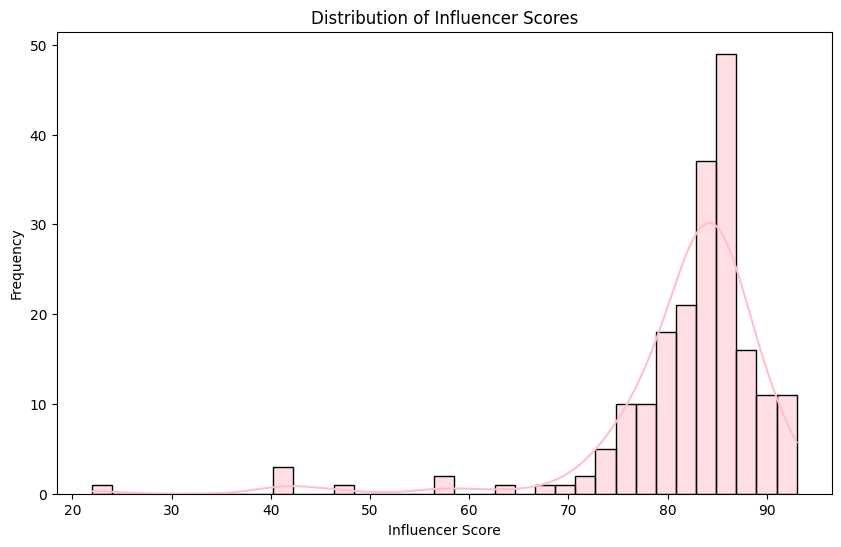

In [22]:
#distribution of influencer score

plt.figure(figsize=(10, 6))
sns.histplot(data['influence_score'], kde=True, color='pink')
plt.title('Distribution of Influencer Scores')
plt.xlabel('Influencer Score')
plt.ylabel('Frequency')
plt.show()

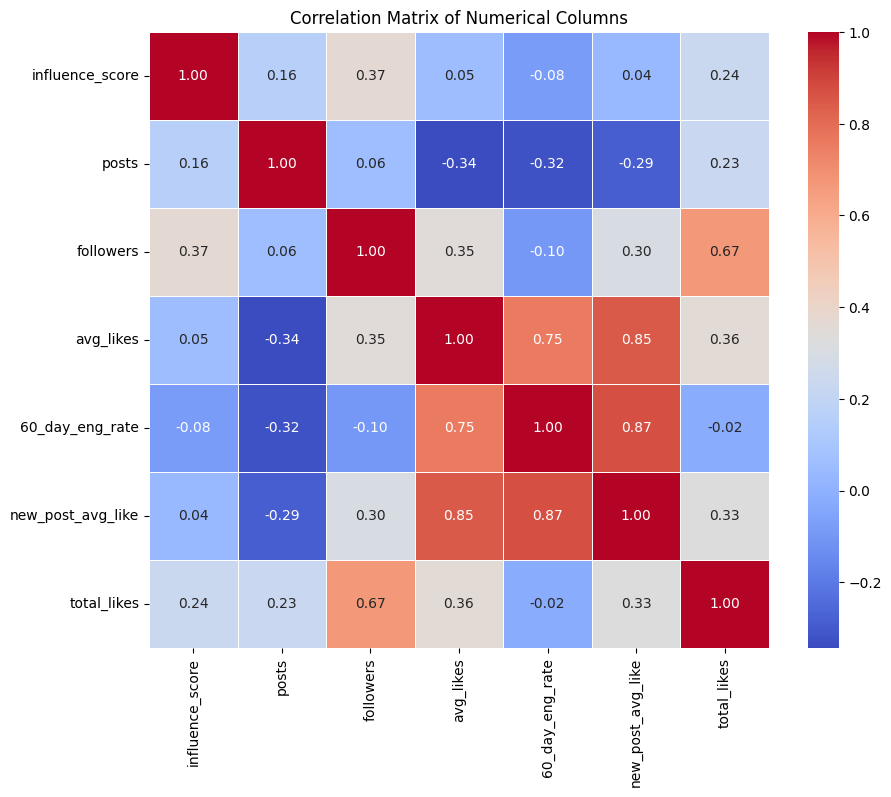

In [23]:
#correlation matrix for numeical values

plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

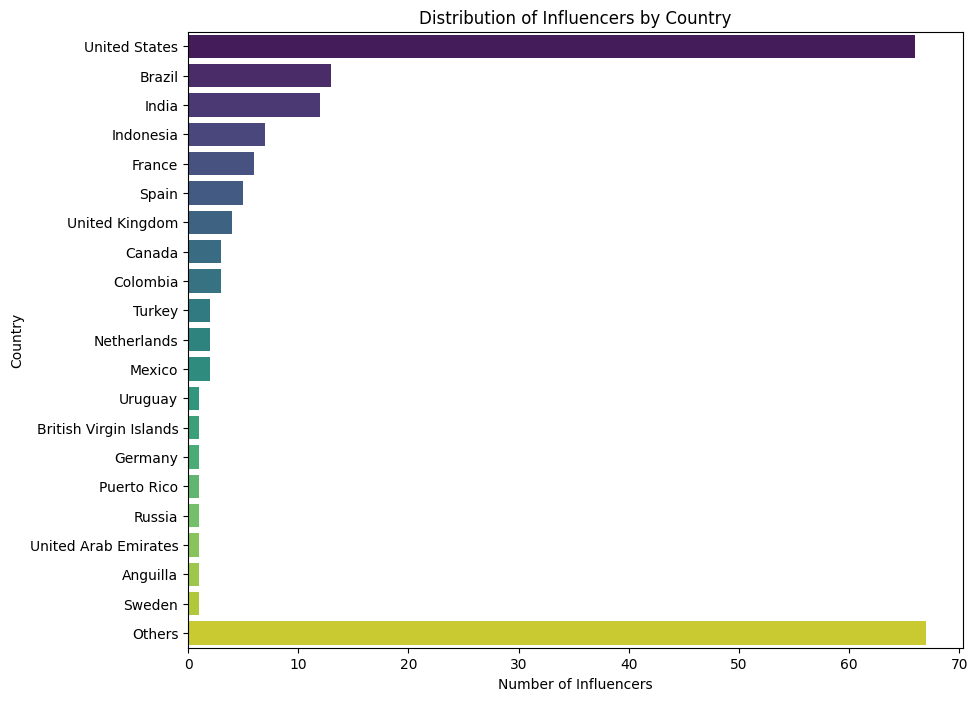

In [24]:
#distribution of influencers by country

country= data['country'].value_counts()[:20].to_list()
name_countries = data['country'].value_counts().index[:20].to_list()

name_countries.append("Others")
max20 = sum(country)
others = len(data) - max20

country.append(others)

plt.figure(figsize=(10, 8))
sns.barplot(x=country, y=name_countries, palette='viridis')
plt.title('Distribution of Influencers by Country')
plt.xlabel('Number of Influencers')
plt.ylabel('Country')
plt.show()

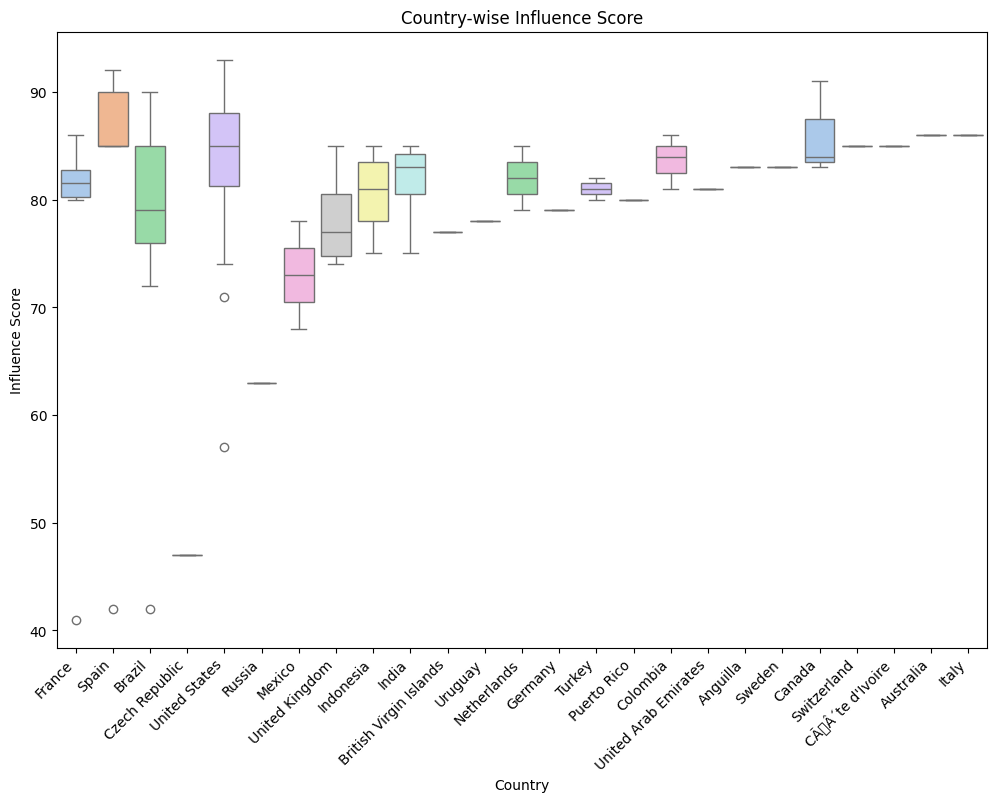

In [25]:
#country wise ifluencers score

plt.figure(figsize=(12, 8))
sns.boxplot(x='country', y='influence_score', data=data, palette='pastel')
plt.title('Country-wise Influence Score')
plt.xlabel('Country')
plt.ylabel('Influence Score')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1200x800 with 0 Axes>

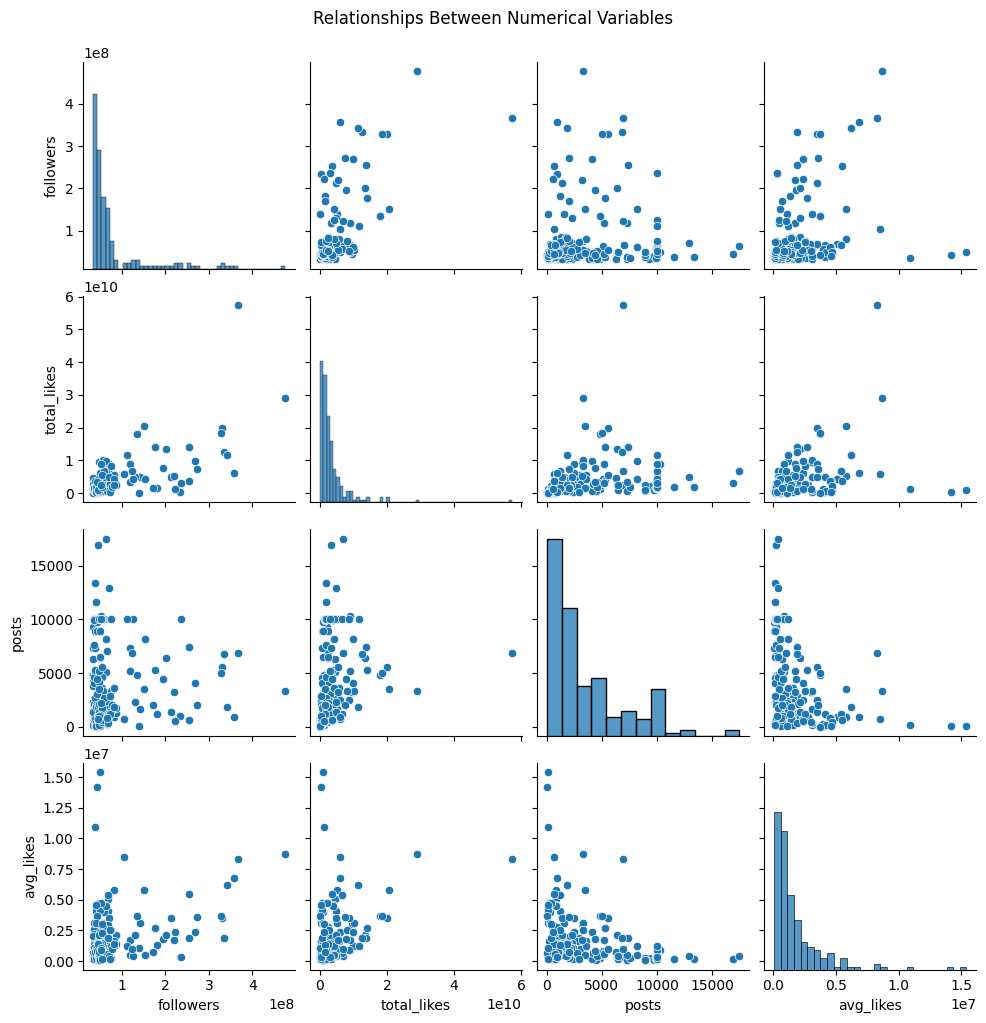

In [26]:
#relationship between numerical variables

plt.figure(figsize=(12, 8))
sns.pairplot(data[['followers', 'total_likes', 'posts', 'avg_likes']])
plt.suptitle('Relationships Between Numerical Variables', y=1.02)
plt.show()

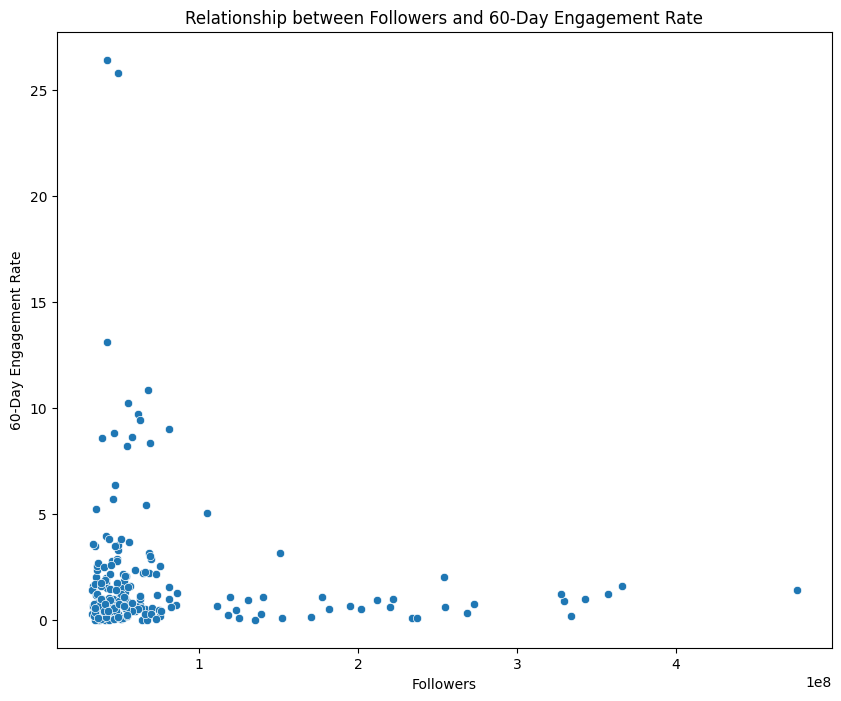

In [27]:
#relationship between followers and engagement 

plt.figure(figsize=(10, 8))
sns.scatterplot(x='followers', y='60_day_eng_rate', data=data)
plt.title('Relationship between Followers and 60-Day Engagement Rate')
plt.xlabel('Followers')
plt.ylabel('60-Day Engagement Rate')
plt.show()

In [28]:
#handling missing values
#replace numerical values with median and categorical with mode

for columns in data.columns:
    if data[columns].dtype == 'object':
        data[columns].fillna(data[columns].mode()[0], inplace=True)
    else:
        data[columns].fillna(data[columns].mean(), inplace=True)

In [29]:
#converting into appropriate data
data['followers'] = data['followers'].astype(int)
data['posts'] = data['posts'].astype(int)
data['total_likes'] = data['total_likes'].astype(int)

In [30]:
#display summary statistics for numerical columns 
print(data[['influence_score', 'followers', 'avg_likes','60_day_eng_rate', 'new_post_avg_like']].describe())

       influence_score     followers     avg_likes  60_day_eng_rate  \
count       200.000000  2.000000e+02  2.000000e+02       200.000000   
mean         81.820000  7.740950e+07  1.787104e+06         1.902010   
std           8.878159  7.368727e+07  2.193359e+06         3.321342   
min          22.000000  3.280000e+07  6.510000e+04         0.010000   
25%          80.000000  4.000000e+07  5.044000e+05         0.410000   
50%          84.000000  5.005000e+07  1.100000e+06         0.895000   
75%          86.000000  6.890000e+07  2.100000e+06         2.032500   
max          93.000000  4.758000e+08  1.540000e+07        26.410000   

       new_post_avg_like  
count       2.000000e+02  
mean        1.208132e+06  
std         1.858322e+06  
min         0.000000e+00  
25%         1.957500e+05  
50%         5.321500e+05  
75%         1.325000e+06  
max         1.260000e+07  


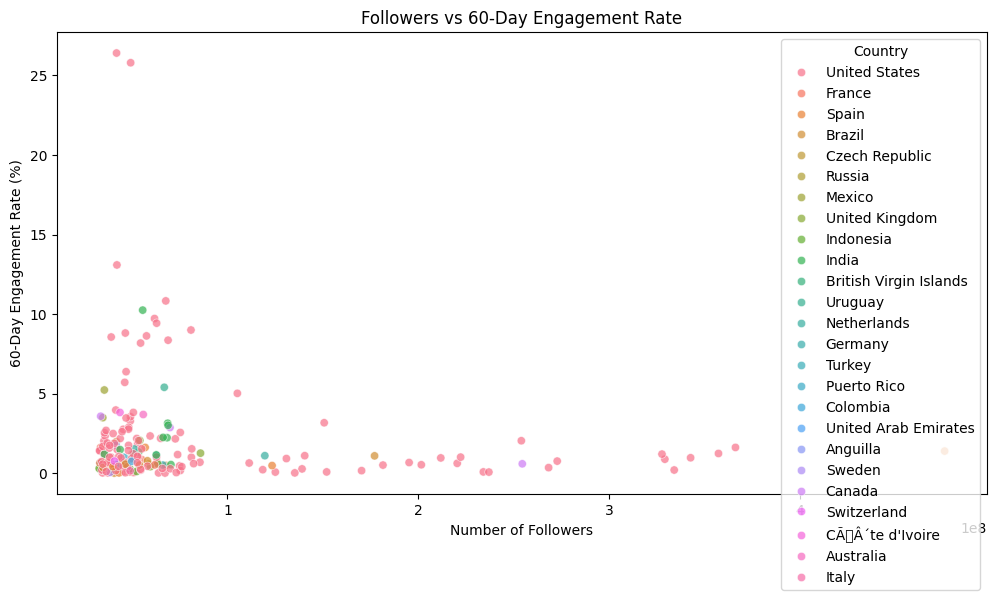

In [31]:
#relationship between followers and engagement

plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='followers', y='60_day_eng_rate',hue='country', alpha=0.7)
plt.title('Followers vs 60-Day Engagement Rate')
plt.xlabel('Number of Followers')
plt.ylabel('60-Day Engagement Rate (%)')
plt.legend(title='Country')
plt.show()

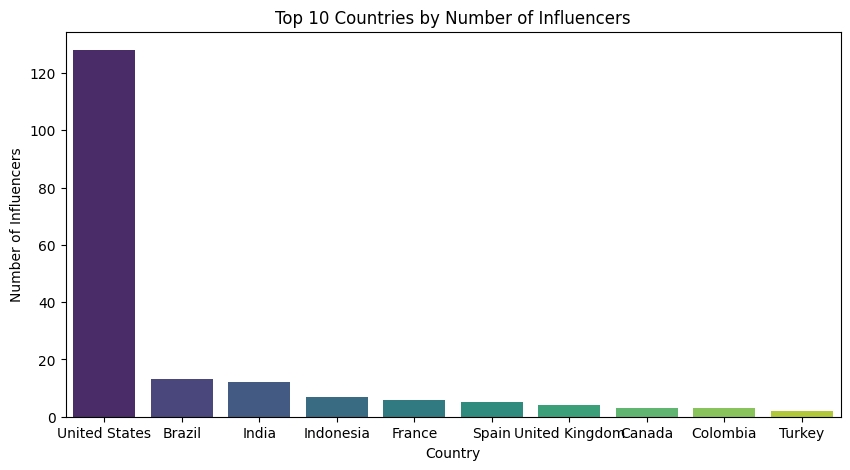

In [32]:
#most active countries

top_countries = data['country'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_countries.index, y=top_countries.values,palette="viridis")
plt.title('Top 10 Countries by Number of Influencers')
plt.xlabel('Country')
plt.ylabel('Number of Influencers')
plt.show()

In [33]:
#feature enginerring

data['like_follower_ratio'] = data['total_likes'] / data['followers']
data['post_follower_ratio'] = data['posts'] / data['followers']
data['avg_likes_ratio'] = data['avg_likes'] / data['followers']

In [34]:
#model building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [35]:
# feature variables and targets

X = data[['followers', 'avg_likes', '60_day_eng_rate','new_post_avg_like', 'like_follower_ratio','post_follower_ratio']]
y = data['influence_score']

In [36]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [37]:
#standardize features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [38]:
#intialize and train a Randomforestregressor

model = RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [39]:
#Predications and evaluation

y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 21.289927499999994
R^2 Score: -0.18478953775520823


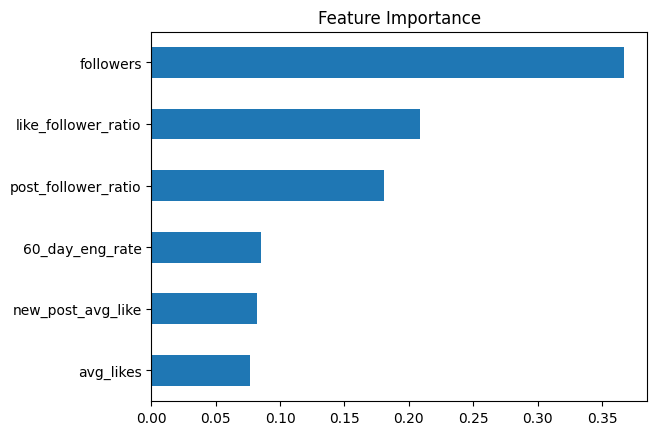

In [40]:
#display feature importance

feature_importances = pd.Series(model.feature_importances_,index=X.columns)
feature_importances.sort_values().plot(kind='barh',title='Feature Importance')
plt.show()

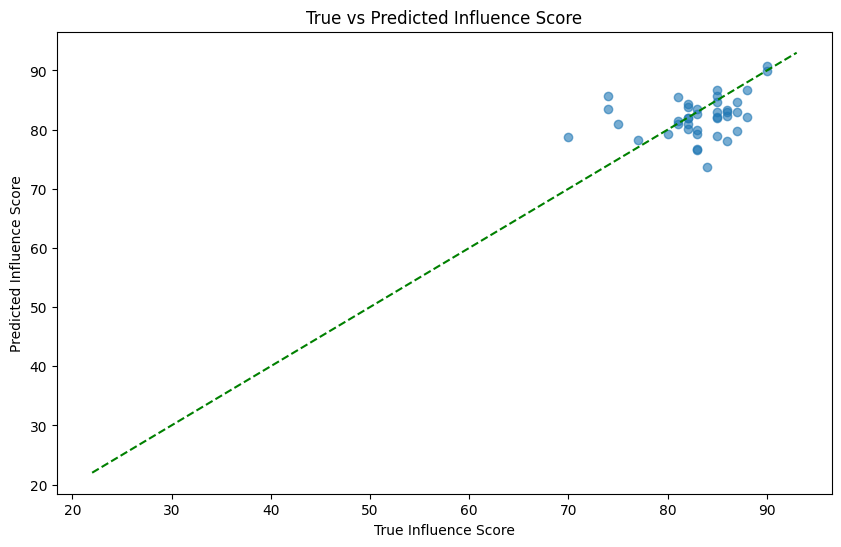

In [41]:
#visualizing Predictions

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--',color='green')
plt.xlabel('True Influence Score')
plt.ylabel('Predicted Influence Score')
plt.title('True vs Predicted Influence Score')
plt.show()